In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def Line_drawer(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, 30, 70) # detect edges using edge intensity of the gray version of the image.jpg,
    #  it detects the edges by establishing a color gradient along edges and using those gradients to define thin lines where edges should be,
    #  whether or not they are edges is then defined by whether the intensity of the shift in gradient is above or below certain thresholds
    #  that you define when calling Canny, so the second value you input is defined as the minimum threshold for gradient intensity,
    #  which if any edges have an intensity lower than that they are discarded, the second threshold is the maximum intensity, 
    #  which establishes that for any edges with a greater gradient intensity they are instantly accepted as edges, 
    #  and if some edges are in-between the thresholds, they are defined as edges or not based on whether they touch pixels that are a part of the edges.
    #  for the parameters I would suggest anywhere from 55-80 to 50-110


    slope_list=[]
    line_list=[]

    color_order=[(0,255,0),(0,0,255),(255,0,0),(100,100,100),(0,0,0),(150,30,90),(180,50,20)] #Color cycle list
    color_order=[(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0),(0,255,0)] # In case you want all green, yes this is a backwards solution
    i=0
    j=0

    lines = cv2.HoughLinesP(edges,10,np.pi/210,10,minLineLength=100,maxLineGap=20,) # detect lines
    # takes in edges, an array of lines mapped in cartesian space onto the image resolution
    # also takes in Rho which is distance resolution
    # then it takes in Theta which is angular pixel resolution, note: only seems to work for pi/(k*30) values, where k is some natural number, idk why
    # then it takes in a threshold for lines it will show, only lines that get more than the thresholds votes will be shown. suggest to be 10
    # then it takes in minLineLength which states the minimum length required in pixels for a line to be shown
    # then it takes in maxLineGap which states the maximum distance between two lines in points in a line for those points to be considered apart of a single line


    if lines is not None:
        for line in lines:
            if line is not None and len(line) != 0:
                x1, y1, x2, y2 = line[0]
                if (x2-x1)!=0:
                    pass
                elif (x2-x1)==0:
                    x2+=.1
                    
                slope=(y2-y1)/(x2-x1)
                slope_list.append(slope)
                line_list.append(([x1,y1,x2,y2]))
                i+=1
                i=i%6
                j+=1

                # for k in range(len(slope_list)):
                #     if np.abs(slope)>.9:
                #         if round(slope,2) ==round(slope_list[k],2):
                #             (cv2.line(img,(x1,y1),(line_list[k][2],line_list[k][3]),color_order[i],10))
                #         else:
                (cv2.line(img, (x1, y1), (x2, y2), color_order[i], 10))
                ##return(img) used to be here but after moving it out I now get like 200 lines, before the problem was that my plotter would only show one line so maybe this will fix it
            else:
                pass
        else:
            pass
        return(img)

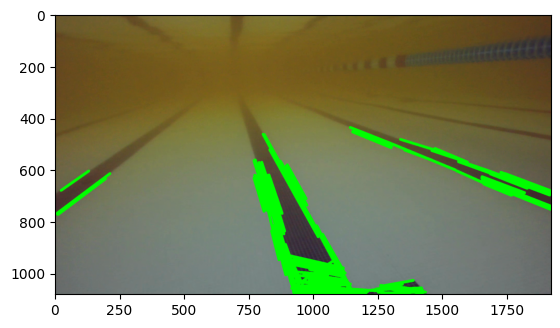

In [153]:
plt.imshow(Line_drawer(img))

In [155]:
img = cv2.imread('rov_pool.jpg')

In [156]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

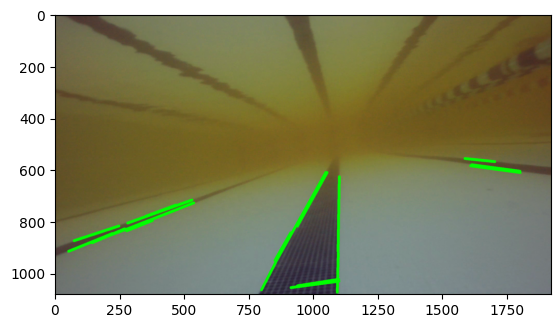

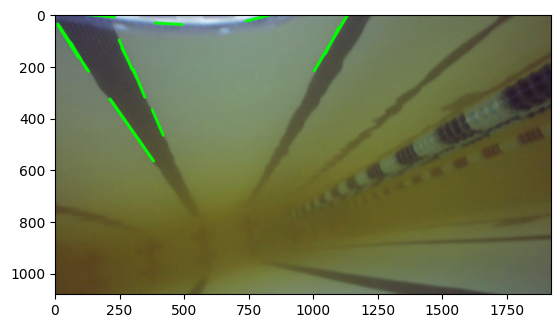

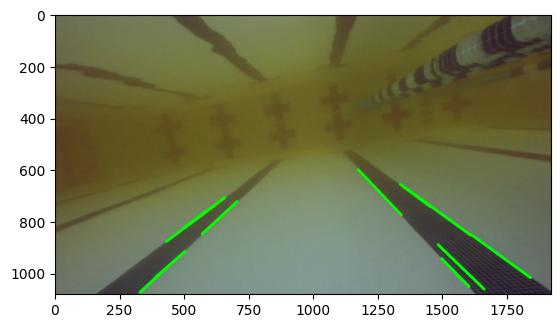

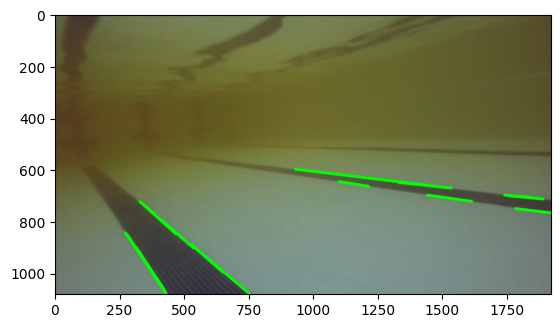

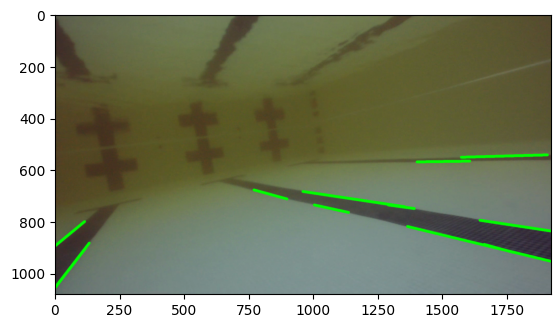

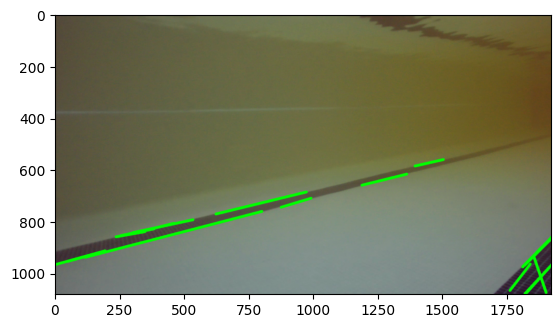

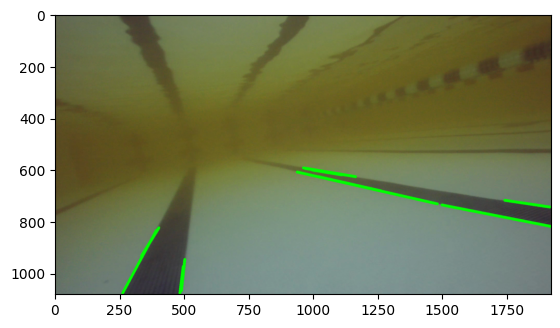

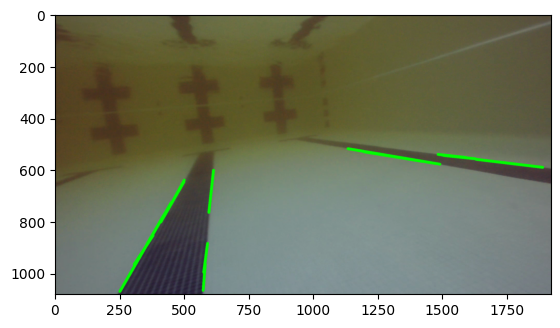

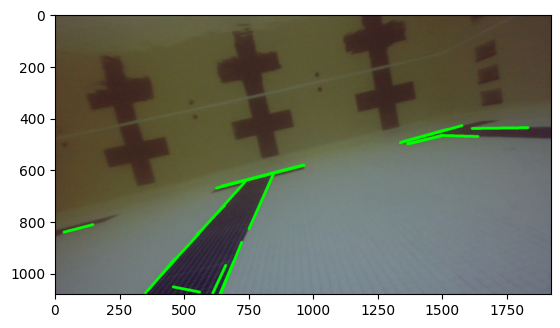

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 0 has a wrong type


In [158]:
count=0
frequency=200
pic_list=[]
while ret:
    if count%frequency==0:
        plt.imshow(Line_drawer(frame))
        plt.show()
        count+=1
    count+=1

    ret, frame = cap.read()

In [98]:
plt.show(Line_drawer(frame))

In [100]:
plt.show()